<a href="https://colab.research.google.com/github/CairoBraz/ProjetoDindin/blob/main/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 - Importar imagens do TensorFlow**


In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-05-18 13:27:38--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 64.233.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  20.9MB/s    in 3.1s    

2024-05-18 13:27:42 (20.9 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



**2 - Descompactar o arquivo zipado**

In [ ]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

**3 - Instalar biblioteca do tensorFlow**

In [ ]:
!pip install tensorflow

**4 - Importar as bibliotecas:**
os -> para ajudar a definir diretorios,
matplotlib -> plotar gráficos e imagens,
tensorflow -> implementar modelo de ia

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

 **5 - Definir as variáveis conforme os diretórios e
printar a quantide de ítens para treinamento e validação**

In [ ]:
dataset_dir = os.path.join(os.getcwd(), 'cats_and_dogs_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cats')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dogs')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cats')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dogs')))

print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_validation_cats_len)
print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)

Train Cats: 1000
Train Dogs: 500
Validation Cats: 500
Validation Dogs: 500


**6 - Definir configurações de entrada:**
tamanho: 160X160 scaling down
valor_cor: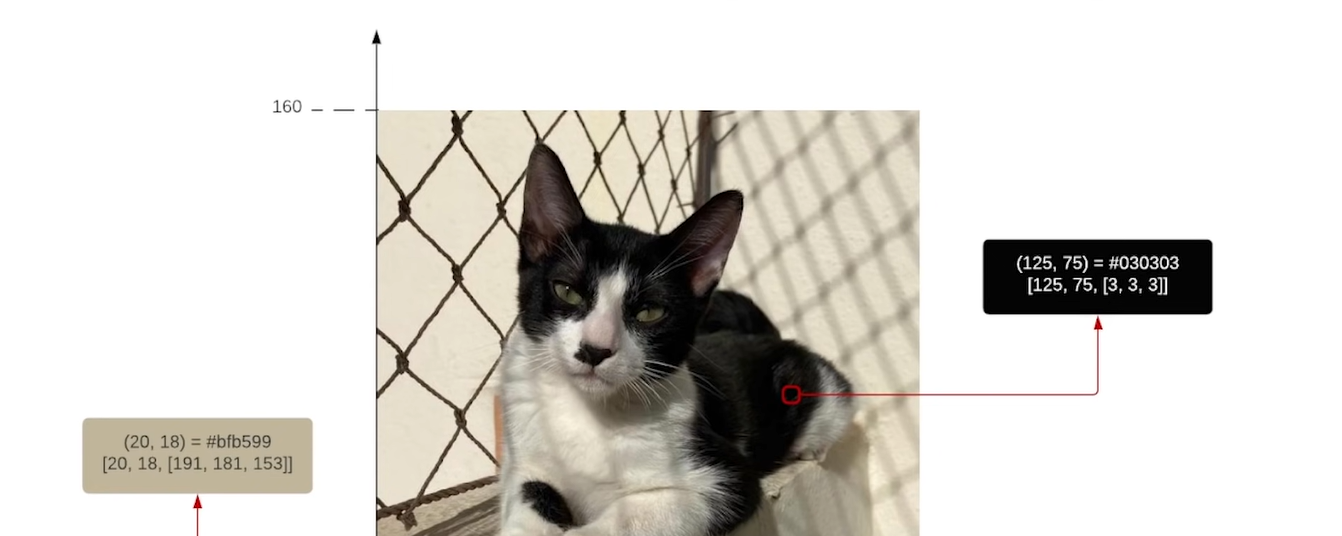


In [ ]:
image_width = 160                                  # largura da imagem em pixels
image_height = 160                                  # altura da imgaem em pixels
image_color_channel = 3                   # canais de cor na imagem (3 para RGB)
image_color_channel_size = 255 # tamanho máximo de cada canal de cor (255 para cores de 8 bits)
image_size = (image_width, image_height)                     # tamanho da imagem
image_shape = image_size + (image_color_channel,)              # forma da imagem

batch_size = 32                     # tamanho do lote (batch) para processamento
epochs = 20                 # numero de iteracoes sobre todo o conjunto de dados
learning_rate = 0.0001                                     # taxa de aprendizado

class_names = ['cat', 'dog']              # nomes das classes para classificação

**7 - Criar os objetos dataset de treinamento**:
Usado para treinar os parâmetros da rede neural

In [ ]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2000 files belonging to 2 classes.


**8 - Criar o dataset de validação**: Validar o meu modelo durante o treinamento

In [ ]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 1000 files belonging to 2 classes.


**9 - Dataset de teste, a partir do dataset de validação**: usado no final para testar o modelo

In [ ]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality : %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality : 26
Test Dataset Cardinality: 6


**10 - Funcao para plotar imagens dos datasets**

In [ ]:
def plot_dataset(dataset):

  plt.gcf().clear()
  plt.figure(figsize = (15,15))

  for features, labels in dataset.take(1):

    for i in range(9):

      plt.subplot(3, 3, i +1)
      plt.axis('off')

      plt.imshow(features[i].numpy().astype('uint8'))
      plt.title(class_names[labels[i]])

**11 - Chamar a função para os dataset**

In [ ]:
plot_dataset(dataset_train)

In [ ]:
plot_dataset(dataset_validation)

In [ ]:
plot_dataset(dataset_test)

**A imagem abaixo representa o algoritmo de uma rede neural convolucional.**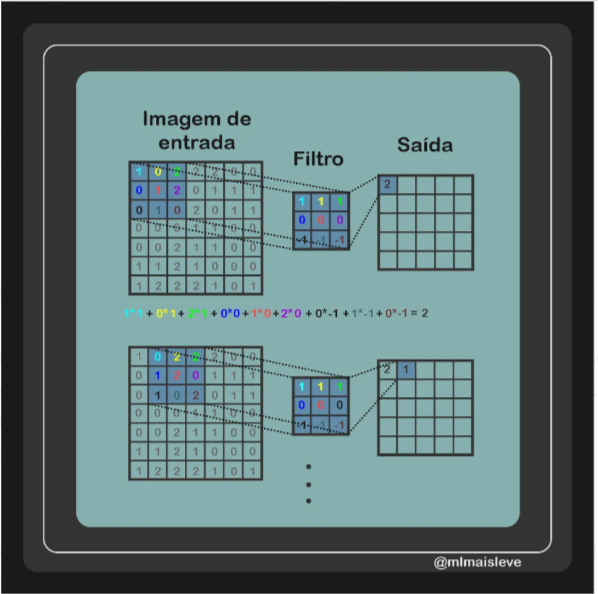

* Um filtro, chamado de kernel, é uma matriz com valores. Seus valores dependem do objetivo desse filtro. Esses filtros se comportam como uma pequena janela ou região que realiza operações ao longo da imagem.
* Em cada passo, cada elemento do filtro é multiplicado pelo elemento de mesma posição na região em que o filtro está sendo aplicado naquele instante. No fim, soma-se os resultados dessas multiplicações para ter um único valor como saída. Esse valor será o pixel correspondente na imagem filtrada.
* O filtro vai “caminhando” ao longo da imagem realizando essa mesma operação. O resultado é uma imagem filtrada.
* Uma única camada convolucional pode ser constituída de diversos filtros. Ao adicionar mais camadas (tornar a rede mais profunda), a ideia é que a rede realize a combinação de características extraídas por camadas anteriores. Por exemplo, se a primeira camada aprendeu a extrair bordas em diferentes orientações, a camada seguinte combina essas bordas para aprender a detectar formas mais complexas, como curvas e cantos.
* Quanto mais profundo, maior é a capacidade da rede extrair características complexas.
* Quando os valores dos filtros são inicializados eles inicialmente extraem características aleatórias. O objetivo de aplicar isso em uma rede neural é justamente que o computador aprenda por si só os valores ideais dos filtros. Isso significa que a rede aprende sozinha quais características da imagem são importantes para realizar a tarefa que lhe foi designada.

**12 - Implantar o modelo**:
tipo sequencial -> uma camada aplicada após a outra.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(
        1. / image_color_channel_size,
        input_shape = image_shape
    ),
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary() # resumo do modelo


In [ ]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs
)